In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('vg_trend.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')

print(df.dtypes)
df.head()

Name                       object
Platform                   object
Year_of_Release    datetime64[ns]
Genre                      object
Publisher                  object
NA_Sales                  float64
EU_Sales                  float64
JP_Sales                  float64
Other_Sales               float64
Global_Sales              float64
Critic_Score              float64
Critic_Count              float64
User_Score                 object
User_Count                float64
Developer                  object
Rating                     object
dtype: object


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
new_df = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
new_df.head(100)

,Year_of_Release,Genre,Global_Sales
0,1980-01-01,Action,0.34
1,1980-01-01,Fighting,0.77
2,1980-01-01,Misc,2.71
3,1980-01-01,Shooter,7.07
4,1980-01-01,Sports,0.49
...,...,...,...
95,1992-01-01,Shooter,0.29
96,1992-01-01,Simulation,2.14
97,1992-01-01,Sports,2.95
98,1992-01-01,Strategy,0.37


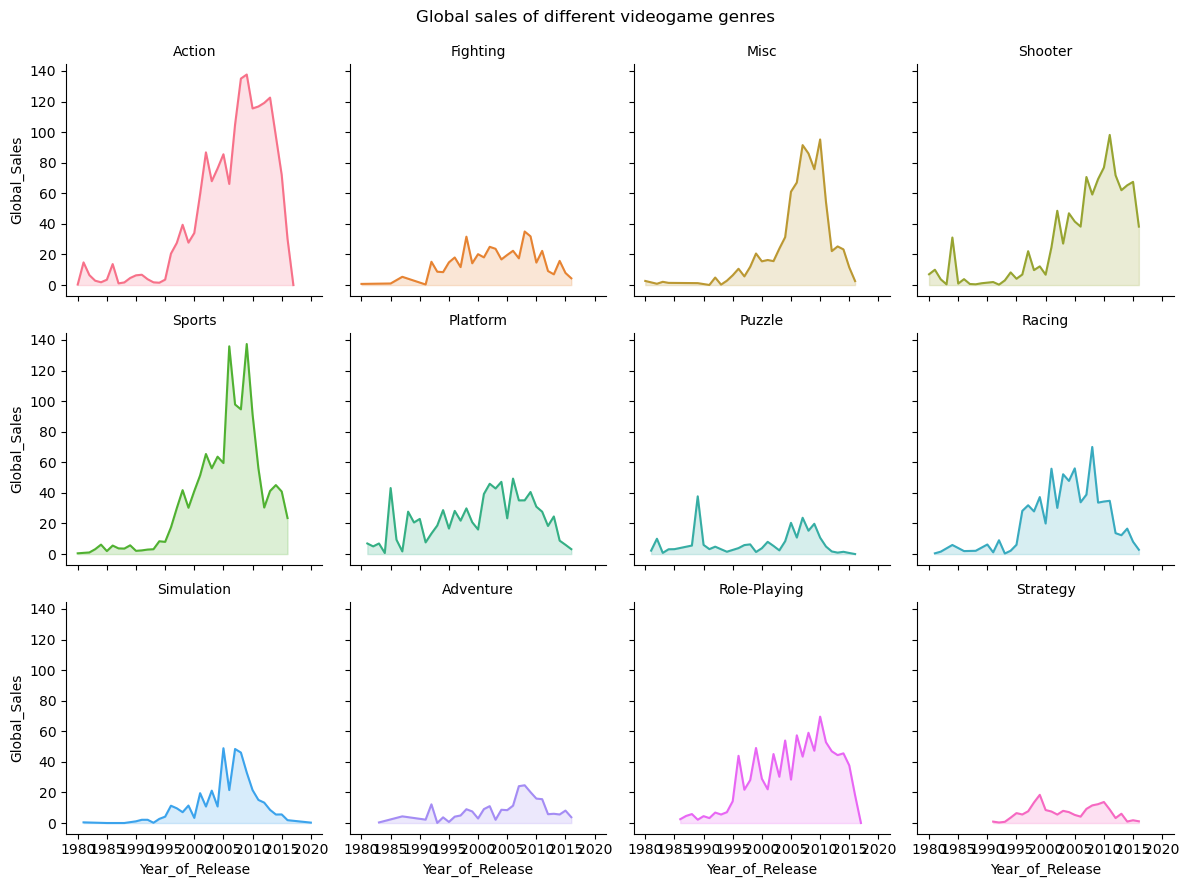

In [66]:
grid = sns.FacetGrid(new_df, col='Genre', hue='Genre', col_wrap=4)

grid = grid.map(plt.plot, 'Year_of_Release', 'Global_Sales')
 
grid = grid.map(plt.fill_between, 'Year_of_Release', 'Global_Sales', alpha=0.2).set_titles("{col_name} Genre")
 
grid = grid.set_titles("{col_name}")


 
plt.subplots_adjust(top=0.92)
grid = grid.fig.suptitle('Global sales of different videogame genres')
plt.show()